# Decision Tree Classifier on Wine Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [19]:
#Load wine_modified file

In [2]:
wine_modified = pd.read_csv('wine_modified.csv')
print ("Total Count: " + str(len(wine_modified)))
print ("Number of features: " + str(wine_modified.shape[1]))

Total Count: 178
Number of features: 14


In [20]:
#Remove records with missing class label

In [3]:
wine_modified=wine_modified[wine_modified['class'].notnull()]

In [4]:
print ("Total Count: " + str(len(wine_modified)))
print ("Number of features: " + str(wine_modified.shape[1]))

Total Count: 168
Number of features: 14


In [21]:
#Drop records having 7 or more features as NaN

In [5]:
wine_modified=wine_modified.dropna(thresh=7)

In [6]:
print ("Total Count: " + str(len(wine_modified)))
print ("Number of features: " + str(wine_modified.shape[1]))

Total Count: 154
Number of features: 14


In [63]:
##Remove the feature with >50% values NaN

In [7]:
wine_modified=wine_modified.dropna(axis=1,thresh=len(wine_modified)/2)

In [8]:
print ("Total Count: " + str(len(wine_modified)))
print ("Number of features: " + str(wine_modified.shape[1]))

Total Count: 154
Number of features: 13


In [66]:
##Get the features removed above

In [9]:
set(pd.read_csv('wine_modified.csv').columns)-set(wine_modified.columns)

{'Ash'}

In [64]:
##Fill NaN values with feature mean

In [10]:
wine_modified.mean()

class                     1.974026
Alcohol                  12.305935
Malic acid                2.350455
Alcalinity of ash        19.645455
Magnesium                99.496552
Total phenols             2.267403
Flavanoids                1.937983
Nonflavanoid phenols      0.366753
Proanthocyanins           1.582273
Color intensity           4.982338
Hue                       0.954455
OD280/OD315               2.592013
Proline                 727.006494
dtype: float64

In [11]:
wine_modified=wine_modified.fillna(wine_modified.mean())

In [65]:
##List the std of features

In [12]:
wine_modified.loc[:,'Alcohol':].std()

Alcohol                   3.804067
Malic acid                1.116005
Alcalinity of ash         3.456794
Magnesium                14.440377
Total phenols             0.617237
Flavanoids                0.873573
Nonflavanoid phenols      0.127083
Proanthocyanins           0.587671
Color intensity           2.325204
Hue                       0.229412
OD280/OD315               0.723261
Proline                 303.033368
dtype: float64

In [92]:
##Remove rows with outliers in feature alcohol
##Alcohol content cannot be negative

In [13]:
wine_modified=wine_modified[wine_modified['Alcohol'] > 0]

In [14]:
wine_modified.mean()

class                     1.979866
Alcohol                  12.984497
Malic acid                2.348859
Alcalinity of ash        19.748322
Magnesium                99.570285
Total phenols             2.270336
Flavanoids                1.937244
Nonflavanoid phenols      0.366980
Proanthocyanins           1.596577
Color intensity           4.990738
Hue                       0.957289
OD280/OD315               2.591611
Proline                 727.060403
dtype: float64

In [ ]:
##I won't remove any rows for proline as typical proline content is from 300 - 2000 mg/L
##The least value is 278

In [15]:
X_train = pd.read_csv('wine_train_data.csv')

In [16]:
y_train = pd.read_csv('wine_train_labels.csv')

In [17]:
X_test,y_test,X_val,y_val = pd.read_csv('wine_test_data.csv'),pd.read_csv('wine_test_labels.csv'),pd.read_csv('wine_val_data.csv'),pd.read_csv('wine_val_labels.csv')

In [ ]:
##Get accuracy for criterion entropy on validation set

In [18]:
y_val=[i[0] for i in y_val.values]

In [28]:
y_train=[i[0] for i in y_train.values]

In [23]:
# Define Model
clf = DecisionTreeClassifier(criterion='entropy')
# Train
clf.fit(X_train, y_train)
# Predict on validation set
y_pred = clf.predict(X_val)
print ('Validation accuracy = ' + str(np.sum(y_pred == y_val)*1.0/len(y_val)))

Validation accuracy = 0.974358974359


In [ ]:
##Get accuracy for criterion Gini on validation set

In [24]:
# Define Model
clf = DecisionTreeClassifier(criterion='gini')
# Train
clf.fit(X_train, y_train)
# Predict on validation set
y_pred = clf.predict(X_val)
print ('Validation accuracy = ' + str(np.sum(y_pred == y_val)*1.0/len(y_val)))

Validation accuracy = 0.948717948718


In [135]:
##Based on above observation, entropy seems a better option
##Lets check it on test data

In [25]:
y_test=[i[0] for i in y_test.values]

In [33]:
# Define Model
clf = DecisionTreeClassifier(criterion='entropy')
# Train
clf.fit(pd.concat([X_train,X_val]), y_train + y_val)
# Predict on validation set
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.820512820513


In [66]:
for i in [2,5,10,20]:
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
    # Train
    clf.fit(X_train, y_train)
    # Predict on validation set
    y_pred = clf.predict(X_val)
    print ('Validation accuracy for min_sample '+ str(i) + ' = ' + str(np.sum(y_pred == y_val)*1.0/len(y_val)))

Validation accuracy for min_sample 2 = 0.897435897436
Validation accuracy for min_sample 5 = 0.974358974359
Validation accuracy for min_sample 10 = 0.948717948718
Validation accuracy for min_sample 20 = 0.948717948718


In [71]:
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
# Train
clf.fit(pd.concat([X_train,X_val]), y_train + y_val)
# Predict on validation set
y_pred = clf.predict(X_test)
print ('Test accuracy for min_sample 5 = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy for min_sample 5 = 0.820512820513


In [76]:
val={}
for i in range(20,110,20):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
    # Train
    clf.fit(X_train[:i], y_train[:i])
    # Predict on validation set
    y_pred = clf.predict(X_val)
    print ('Valiation accuracy for sample size '+ str(i) + ' = ' + str(np.sum(y_pred == y_val)*1.0/len(y_val)));
    val[i]=str(np.sum(y_pred == y_val)*1.0/len(y_val))

Valiation accuracy for sample size 20 = 0.692307692308
Valiation accuracy for sample size 40 = 0.820512820513
Valiation accuracy for sample size 60 = 0.871794871795
Valiation accuracy for sample size 80 = 0.923076923077
Valiation accuracy for sample size 100 = 0.948717948718


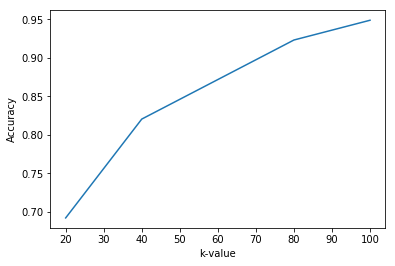

In [85]:
#fig = plt.figure()
plt.plot(sorted(list(val.keys())),sorted(list(val.values())));
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

In [87]:
X_train_val = pd.concat([X_train,X_val])#,pd.concat([y_train,y_val])

In [88]:
y_train_val =y_train + y_val

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
std_scaler = StandardScaler()
X_train_minmax = std_scaler.fit_transform(X_train_val)
X_train_minmax.mean(axis=0)
X_train_minmax.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [91]:
X_train_scaled = std_scaler.transform(X_train)

In [92]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [93]:
X_val_scaled = std_scaler.transform(X_val)

In [94]:
X_val_scaled_df = pd.DataFrame(X_val_scaled)

In [95]:
X_test_scaled = std_scaler.transform(X_test)

In [96]:
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
X_train_val_sc = pd.concat([X_train_scaled_df,X_val_scaled_df])

In [99]:
knn = KNeighborsClassifier(n_neighbors=3,p=2)

In [100]:
knn.fit(X_train_val_sc,y_train_val)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [115]:
predictions = knn.predict(X_test_scaled_df)
print ('accuracy = ' + str(np.sum(predictions == y_test)/(len(y_test)*1.0)))

accuracy = 0.871794871795


In [120]:
#p=1 -> Manhattan, p=2 -> Euclidean, p=8 -> Minkowski 
for i in [1,2,8]:
    knn = KNeighborsClassifier(n_neighbors=3,p=i)
    knn.fit(X_train_scaled,y_train)
    predictions = knn.predict(X_val_scaled)
    print ('accuracy for p=' + str(i) + ' is ' + str(np.sum(predictions == y_val)/(len(y_val)*1.0)))

accuracy for p=1 is 0.948717948718
accuracy for p=2 is 0.923076923077
accuracy for p=8 is 0.923076923077


In [ ]:
## Choosing Manhattan distance
## Test on p=1

In [121]:
knn = KNeighborsClassifier(n_neighbors=3,p=1)
knn.fit(X_train_scaled,y_train)
predictions = knn.predict(X_test_scaled)
print ('accuracy for p=' + str(1) + ' is ' + str(np.sum(predictions == y_test)/(len(y_test)*1.0)))

accuracy for p=1 is 0.948717948718


In [153]:
val={}
for d in [1,3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=d,p=2)
    knn.fit(X_train_scaled,y_train)
    predictions = knn.predict(X_val_scaled)
    print ('accuracy for k=' + str(d) + ' is ' + str(np.sum(predictions == y_val)/(len(y_val)*1.0)))
    val[d]=(np.sum(predictions == y_val)/(len(y_val)*1.0))

accuracy for k=1 is 0.948717948718

accuracy for k=3 is 0.923076923077

accuracy for k=5 is 0.948717948718

accuracy for k=7 is 0.974358974359

accuracy for k=9 is 0.948717948718



In [154]:
val.items()

[(1, 0.94871794871794868),
 (3, 0.92307692307692313),
 (9, 0.94871794871794868),
 (5, 0.94871794871794868),
 (7, 0.97435897435897434)]

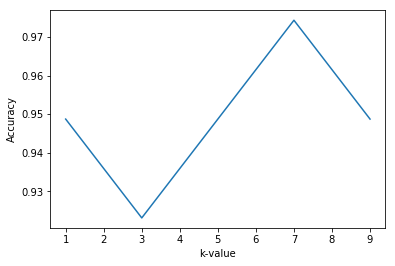

In [158]:
lists = sorted(val.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

In [356]:
##Choosing k=7

In [160]:
knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(X_train_scaled,y_train)
predictions = knn.predict(X_test_scaled)
print ('accuracy for k=7 is ' + str(np.sum(predictions == y_test)/(len(y_test)*1.0)))

accuracy for k=7 is 0.948717948718


In [170]:
val={}
for i in range(20,110,20):
    knn = KNeighborsClassifier(n_neighbors=3,p=2)
    knn.fit(X_train_scaled[:i],y_train[:i])
    predictions = knn.predict(X_val_scaled)
    print ('accuracy for sample size ' + str(i) + ' is ' + str(np.sum(predictions == y_val)/(len(y_val)*1.0)))
    val[i]=(np.sum(predictions == y_val)/(len(y_val)*1.0))

accuracy for sample size 20 is 0.948717948718
accuracy for sample size 40 is 1.0
accuracy for sample size 60 is 1.0
accuracy for sample size 80 is 1.0
accuracy for sample size 100 is 0.923076923077


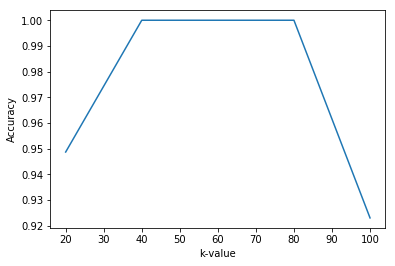

In [171]:
lists = sorted(val.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()